# Business Decisions using Data

In [3]:
import pandas as pd 
import numpy as np
from scipy import stats as scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Project Description

In this project I Will examine some

In [4]:
col_names = ["Hypothesis", "Reach", "Impact", "Confidence", "Effort"]
orders_data = pd.read_csv(r'C:\Users\pauli\Downloads\orders_us.csv')
hypotheses_data = pd.read_csv(r'C:\Users\pauli\Downloads\hypotheses_us.csv', names=col_names, sep=';')
visits_data = pd.read_csv(r'C:\Users\pauli\Downloads\visits_us.csv')

In [3]:
hypotheses_data = hypotheses_data.iloc[1: , :]
dataframes = [orders_data,hypotheses_data,visits_data]
for i in dataframes:
    display(i.head())
    display(i.describe(include = 'object'))
    display(i.info())
    display(i.isnull().sum())
    display(i.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

,Hypothesis,Reach,Impact,Confidence,Effort
1,Add two new channels for attracting traffic. T...,3,10,8,6
2,Launch your own delivery service. This will sh...,2,5,4,10
3,Add product recommendation blocks to the store...,8,3,7,3
4,Change the category structure. This will incre...,8,3,3,8
5,Change the background color on the main page. ...,3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Effort
count,9,9,9,9,9
unique,9,6,7,7,6
top,Add two new channels for attracting traffic. T...,3,3,8,3
freq,1,3,3,3,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      object
 2   Impact      9 non-null      object
 3   Confidence  9 non-null      object
 4   Effort      9 non-null      object
dtypes: object(5)
memory usage: 492.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

0

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group
count,62,62
unique,31,2
top,2019-08-05,B
freq,2,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date      0
group     0
visits    0
dtype: int64

0

In [4]:
display(hypotheses_data)

,Hypothesis,Reach,Impact,Confidence,Effort
1,Add two new channels for attracting traffic. T...,3,10,8,6
2,Launch your own delivery service. This will sh...,2,5,4,10
3,Add product recommendation blocks to the store...,8,3,7,3
4,Change the category structure. This will incre...,8,3,3,8
5,Change the background color on the main page. ...,3,1,1,1
6,Add a customer review page. This will increase...,3,2,2,3
7,Show banners with current offers and sales on ...,5,3,8,3
8,Add a subscription form to all the main pages....,10,7,8,5
9,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
orders_data['date'] = orders_data['date'].astype('string')
visits_data['date'] = visits_data['date'].astype('string')

In [6]:
hypotheses_data[['Reach', 'Impact', 'Confidence','Effort' ]] = hypotheses_data[['Reach', 'Impact', 'Confidence','Effort' ]].apply(pd.to_numeric)
display(hypotheses_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

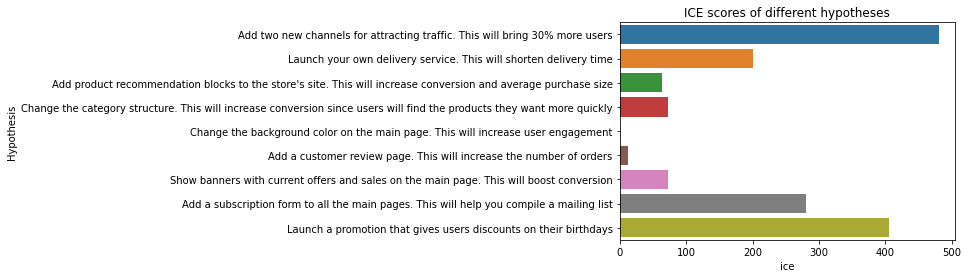

In [7]:
hypotheses_data['ice'] = hypotheses_data['Impact'] * hypotheses_data['Confidence'] * hypotheses_data['Effort']

ax = sns.barplot(data=hypotheses_data,x="ice", y="Hypothesis")
plt.title('ICE scores of different hypotheses')
plt.show()

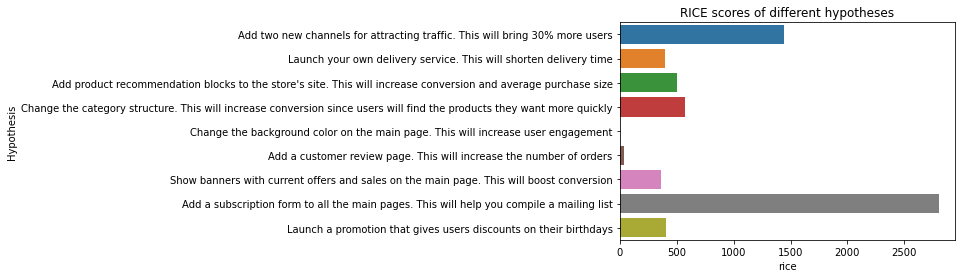

In [8]:
hypotheses_data['rice'] = hypotheses_data['Reach'] * hypotheses_data['Impact'] * hypotheses_data['Confidence'] * hypotheses_data['Effort']

ax = sns.barplot(data=hypotheses_data,x="rice", y="Hypothesis")
plt.title('RICE scores of different hypotheses')
plt.show()

In [1]:
#hypotheses_data.plot(x="Hypothesis", y=["ice", "rice"], kind="bar")
hypotheses_data.plot(x=["ice", "rice"], y='Hypothesis', kind="bar")

NameError: name 'hypotheses_data' is not defined

,transactionId,visitorId,date,revenue,group,rolling_mean
0,3667963787,3312258926,2019-08-15,30.4,B,30.40
1,2804400009,3642806036,2019-08-15,15.2,B,22.80
2,2961555356,4069496402,2019-08-15,10.2,A,10.20
3,3797467345,1196621759,2019-08-15,155.1,B,66.90
4,2282983706,2322279887,2019-08-15,40.5,B,60.30
...,...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B,185.58
1193,2203539145,370388673,2019-08-14,50.1,A,35.39
1194,1807773912,573423106,2019-08-14,165.3,A,47.89
1195,1947021204,1614305549,2019-08-14,5.5,A,46.36


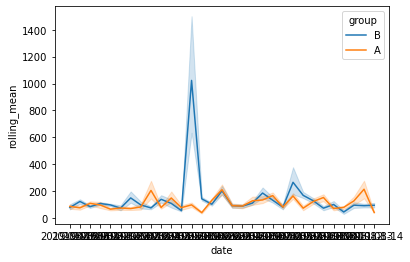

In [10]:
orders_data['rolling_mean'] = orders_data.groupby(['date','group'])['revenue'].apply(lambda x: x.rolling(10, 1).mean())
display(orders_data)

ax=sns.lineplot(data=orders_data, x="date", y="rolling_mean", hue="group")

In [2]:

orders_data['date'] = orders_data['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visits_data['date'] = visits_data['date'] = visits_data['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

#datesGroups = orders_data[['date','group']].drop_duplicates() 
#orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])]

NameError: name 'orders_data' is not defined

In [3]:
# building an array with unique paired date-group values
datesGroups  = orders_data[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits_data[np.logical_and(visits_data['date'] <= x['date'], visits_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

display(cumulativeData.head(5)) 

NameError: name 'orders_data' is not defined

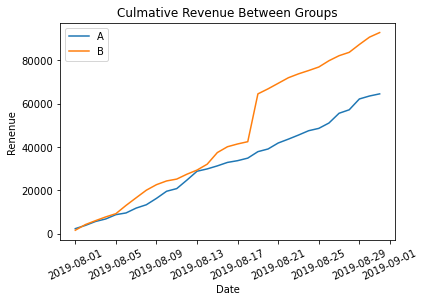

In [33]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xticks(rotation=25)
# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Culmative Revenue Between Groups')
plt.xlabel('Date')
plt.ylabel('Renenue')
plt.legend() 

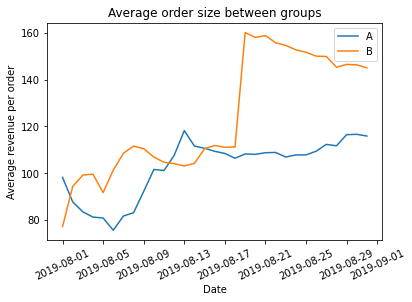

In [36]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=25)
plt.title('Average order size between groups')
plt.xlabel('Date')
plt.ylabel('Average revenue per order')
plt.legend() 

Text(0, 0.5, 'Realtive diffrence')

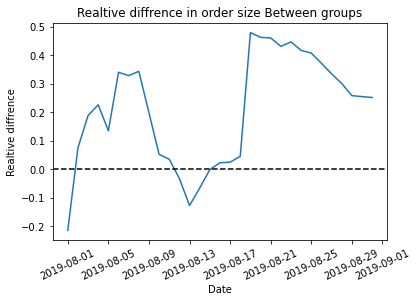

In [40]:

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=25)
plt.title('Realtive diffrence in order size Between groups')
plt.xlabel('Date')
plt.ylabel('Realtive diffrence')

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: transactionId, dtype: int64

<AxesSubplot:xlabel='visitorId', ylabel='transactionId'>

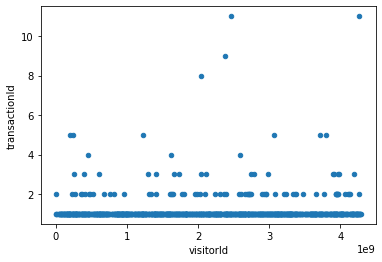

In [56]:
orders_users = orders_data.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()
display(orders_users)
display(orders_users['transactionId'].value_counts())
orders_users.plot.scatter(x='visitorId', y='transactionId')


In [57]:
display(np.percentile(orders_users['transactionId'], [95, 99])) 

array([2., 4.])

,transactionId,revenue
0,1062393,100.8
1,4919758,40.2
2,7210578,60.5
3,8131427,75.5
4,11068804,75.7
...,...,...
1192,4276811111,55.2
1193,4279408906,15.8
1194,4281129020,60.2
1195,4288552432,10.8


<AxesSubplot:xlabel='transactionId', ylabel='revenue'>

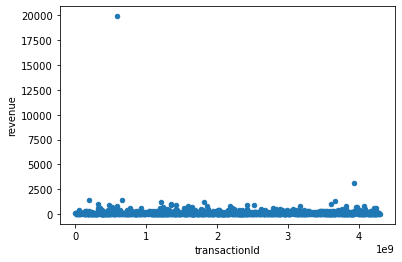

In [59]:
orders_revenue = orders_data.pivot_table(index='transactionId', values='revenue', aggfunc='sum').reset_index()
display(orders_revenue)
orders_revenue.plot.scatter(x='transactionId', y='revenue')

In [60]:
display(np.percentile(orders_revenue['revenue'], [95, 99])) 

array([435.54 , 900.904])

In [63]:
ordersByUsersA = orders_data[orders_data['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_data[orders_data['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(scipy.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.008
0.138


In [65]:
print('{0:.3f}'.format(scipy.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1)) 

0.346
0.252


In [72]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 900]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
(17,)


In [73]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [74]:
print("{0:.3f}".format(scipy.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.167


In [76]:
print('{0:.3f}'.format(scipy.mannwhitneyu(
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_data[np.logical_and(
        orders_data['group']=='B',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_data[np.logical_and(orders_data['group']=='B',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.458
-0.014
